In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Suicide_Ideation_Dataset(Twitter-based).csv')

In [3]:
data.head()

,Tweet,Suicide
0,making some lunch,Not Suicide post
1,@Alexia You want his money.,Not Suicide post
2,@dizzyhrvy that crap took me forever to put to...,Potential Suicide post
3,@jnaylor #kiwitweets Hey Jer! Since when did y...,Not Suicide post
4,Trying out &quot;Delicious Library 2&quot; wit...,Not Suicide post


In [4]:
data['Suicide'].unique()

array(['Not Suicide post', 'Potential Suicide post '], dtype=object)

In [5]:
# remove leading/trailing spaces
# encoding target variable
data['Suicide'] = data['Suicide'].str.strip() 
data['Suicide'] = data['Suicide'].apply(lambda x: 0 if x == 'Not Suicide post' else 1)

In [6]:
data.head()

,Tweet,Suicide
0,making some lunch,0
1,@Alexia You want his money.,0
2,@dizzyhrvy that crap took me forever to put to...,1
3,@jnaylor #kiwitweets Hey Jer! Since when did y...,0
4,Trying out &quot;Delicious Library 2&quot; wit...,0


### Data Preprocessing

In [8]:
#lets see if there is any missing values 
data.isnull().sum()

Tweet      2
Suicide    0
dtype: int64

In [9]:
#since there is only 2 rows with missing values we will drop 
data.dropna(inplace = True)

In [10]:
data.isnull().sum()

Tweet      0
Suicide    0
dtype: int64

In [11]:
data['Suicide'].value_counts(normalize = True)

Suicide
0    0.630812
1    0.369188
Name: proportion, dtype: float64

<Axes: ylabel='proportion'>

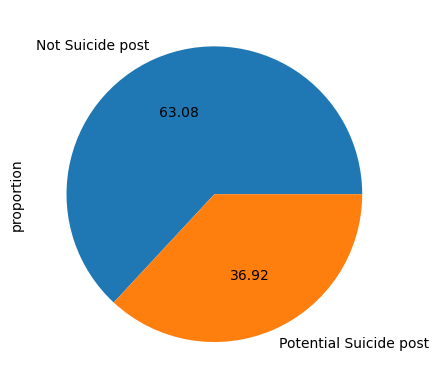

In [12]:
#lets visualize distribution of Suicide feature.
data['Suicide'].value_counts(normalize = True).plot(kind = 'pie',labels = ['Not Suicide post','Potential Suicide post'],autopct = '%0.2f')

In [13]:
#lets see if there is any duplicated values
data.duplicated().sum()

8

In [14]:
#lets drop duplicate values
data.drop_duplicates(keep = 'first',inplace = True)

In [15]:
data.duplicated().sum()

0

In [33]:
data['Tweet'].unique()

array(['making some lunch', '@Alexia You want his money.',
       '@dizzyhrvy that crap took me forever to put together. iâ\x80\x99m going to go sleep for DAYS',
       ...,
       "@belledame222 Hey, it's 5 am...give a girl some credit for trying.",
       '2 drunken besties stumble into my room and we run around with sober CJ and drunk Hope knocking on doors. Good times at 3am.',
       '@dancingbonita &quot;I friggin love you!!!&quot; -Ron Burgundy, riding a unicorn'],
      dtype=object)

### Text Preprocessing

In [37]:
import re 
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [39]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anand\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\anand\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [48]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
import string 
string.punctuation
stopwords = stopwords.words('english')
nltk.download('punkt')
from nltk.stem.porter import PorterStemmer 
ps = PorterStemmer()
ps.stem('dancing')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anand\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


'danc'

### Text preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and puntuation
- stemming

In [50]:
#lets make a function for doing all this 
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return ' '.join(y)

In [44]:
data.head()

,Tweet,Suicide
0,making some lunch,0
1,@Alexia You want his money.,0
2,@dizzyhrvy that crap took me forever to put to...,1
3,@jnaylor #kiwitweets Hey Jer! Since when did y...,0
4,Trying out &quot;Delicious Library 2&quot; wit...,0


In [52]:
data['transformed_text'] = data['Tweet'].apply(transform_text)

In [54]:
data

,Tweet,Suicide,transformed_text
0,making some lunch,0,make lunch
1,@Alexia You want his money.,0,alexia want money
2,@dizzyhrvy that crap took me forever to put to...,1,dizzyhrvi crap took forev put togeth go go sle...
3,@jnaylor #kiwitweets Hey Jer! Since when did y...,0,jnaylor kiwitweet hey jer sinc start twitter
4,Trying out &quot;Delicious Library 2&quot; wit...,0,tri quot delici librari 2 quot mix result bar ...
...,...,...,...
1782,i have forgotten how much i love my Nokia N95-1,0,forgotten much love nokia
1783,Starting my day out with a positive attitude! ...,0,start day posit attitud great watch great
1784,"@belledame222 Hey, it's 5 am...give a girl som...",0,belledame222 hey 5 give girl credit tri
1785,2 drunken besties stumble into my room and we ...,0,2 drunken besti stumbl room run around sober c...


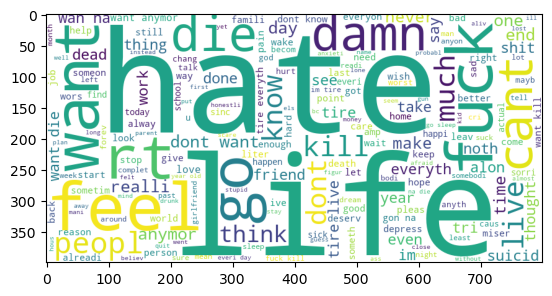

In [64]:
#let's make a word cloud of Potential Suicide post
from wordcloud import WordCloud
wc = WordCloud(
     width = 800,
     height = 400,
     min_font_size = 10,
     background_color = 'white'
)
potention_suicide = wc.generate(data[data['Suicide'] == 1]['transformed_text'].str.cat(sep = ' '))
plt.imshow(potention_suicide)

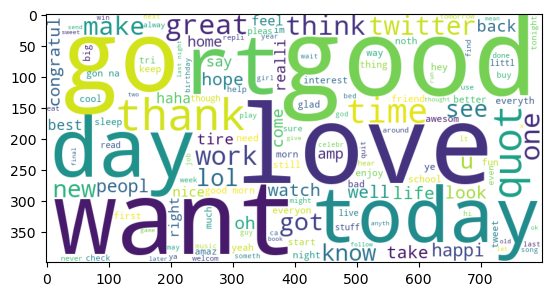

In [66]:
#let's make a word cloud of Not Potential Suicide post
from wordcloud import WordCloud
wc = WordCloud(
     width = 800,
     height = 400,
     min_font_size = 10,
     background_color = 'white'
)
potention_suicide = wc.generate(data[data['Suicide'] == 0]['transformed_text'].str.cat(sep = ' '))
plt.imshow(potention_suicide)

In [94]:
#lets see top 20 words in Potential Suicide post and Not Suicide post
post_corpus = []
for msg in data[data['Suicide']==1]['transformed_text'].tolist():
    for words in msg.split():
        post_corpus.append(words)

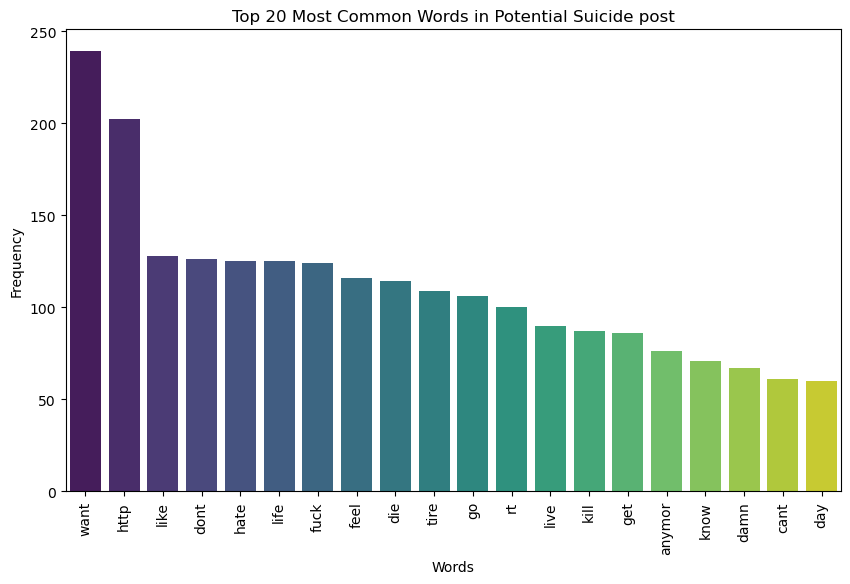

In [96]:
# Count most common words
from collections import Counter
word_counts = Counter(post_corpus).most_common(20)

# Convert to DataFrame
df_wc = pd.DataFrame(word_counts, columns=['word', 'count'])

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='word', y='count', data=df_wc, palette='viridis')
plt.xticks(rotation=90)
plt.title('Top 20 Most Common Words in Potential Suicide post')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

In [106]:
not_suicide_corpus = []
for msg in data[data['Suicide']==0]['transformed_text'].tolist():
    for words in msg.split():
        not_suicide_corpus.append(words)

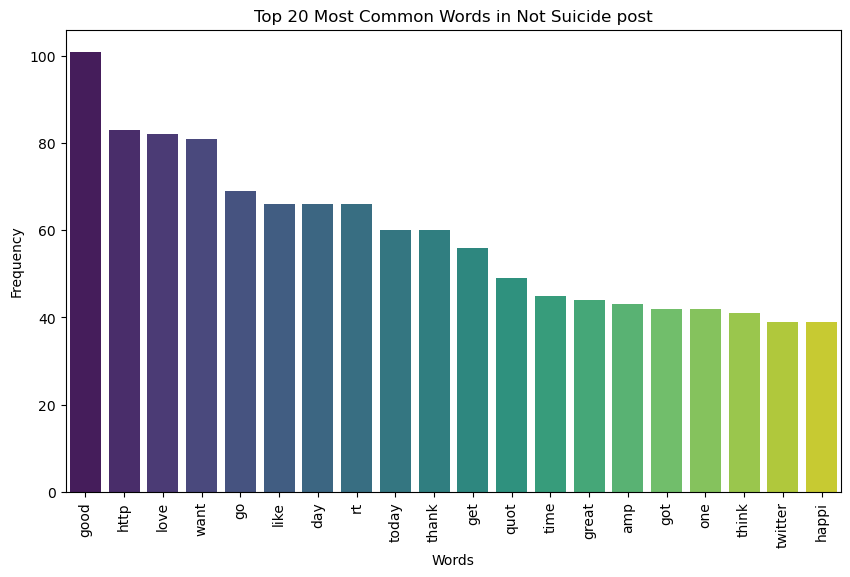

In [110]:
# Count most common words
from collections import Counter
not_suicide_word_counts = Counter(not_suicide_corpus ).most_common(20)

# Convert to DataFrame
df_not_suicide = pd.DataFrame(not_suicide_word_counts, columns=['word', 'count'])

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='word', y='count', data=df_not_suicide, palette='viridis')
plt.xticks(rotation=90)
plt.title('Top 20 Most Common Words in Not Suicide post')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

### Bow

In [118]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [182]:
cv = CountVectorizer()
cv = CountVectorizer(stop_words = 'english',ngram_range=(1,1))

In [184]:
X = cv.fit_transform(data['transformed_text']).toarray()

In [186]:
y = data['Suicide']

In [188]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [134]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [136]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.6264044943820225
[[106 119]
 [ 14 117]]
0.4957627118644068


In [140]:
y_pred = gnb.predict(X_test)

In [142]:
y_pred

array([0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,

In [144]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.47      0.61       225
           1       0.50      0.89      0.64       131

    accuracy                           0.63       356
   macro avg       0.69      0.68      0.63       356
weighted avg       0.74      0.63      0.62       356



In [146]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6264044943820225

Confusion Matrix:
 [[106 119]
 [ 14 117]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.47      0.61       225
           1       0.50      0.89      0.64       131

    accuracy                           0.63       356
   macro avg       0.69      0.68      0.63       356
weighted avg       0.74      0.63      0.62       356



In [150]:
mnb.fit(X_train,y_train)
y_pred1 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.848314606741573
[[178  47]
 [  7 124]]
0.7251461988304093


In [152]:
bnb.fit(X_train,y_train)
y_pred1 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8567415730337079
[[223   2]
 [ 49  82]]
0.9761904761904762


### TF-IDF

In [154]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
tfidf = TfidfVectorizer()

In [158]:
X = tfidf.fit_transform(data['transformed_text']).toarray()

In [160]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 2)

In [162]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.6432584269662921
[[118 110]
 [ 17 111]]
0.502262443438914


In [164]:
mnb.fit(X_train,y_train)
y_pred1 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.898876404494382
[[212  16]
 [ 20 108]]
0.8709677419354839


- after using Bow and TF-IDF i am getting 97% accuracy using BernoulliNB by using BOW 
- while TF-IDF also perfermed well and i got better accuracy but since my data is imbalanced i 
- i will go with high precision score

### Bernoulli naive bayes our best model for this project

In [190]:
bnb.fit(X_train,y_train)
y_pred1 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8567415730337079
[[223   2]
 [ 49  82]]
0.9761904761904762


In [193]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))